In [2]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the cleaned dataset
df = pd.read_csv("../data/clean_data.csv")

In [4]:
# display the first 5 rows of DataFrame
df.head()

,age,capital-gain,capital-loss,hours-per-week,income,occupation_group,marital_status_group,Relationship_Group,native_group,workclass_group,race_group,sex_group,education_group
0,39,2174,0,40,0,Other,0,Family,1,0,1,1,Bachelor's Degree
1,50,0,0,13,0,Management,1,Spouse,1,0,1,1,Bachelor's Degree
2,38,0,0,40,0,Skilled,0,Family,1,1,1,1,High School Graduation
3,53,0,0,40,0,Skilled,1,Spouse,1,1,0,1,Secondary
4,28,0,0,40,0,Professional,1,Spouse,0,1,0,0,Bachelor's Degree


In [5]:
## Split the data into Independent and dependent features
X = df.drop(labels=['income'],axis=1)
Y = df[['income']]

In [6]:
X

,age,capital-gain,capital-loss,hours-per-week,occupation_group,marital_status_group,Relationship_Group,native_group,workclass_group,race_group,sex_group,education_group
0,39,2174,0,40,Other,0,Family,1,0,1,1,Bachelor's Degree
1,50,0,0,13,Management,1,Spouse,1,0,1,1,Bachelor's Degree
2,38,0,0,40,Skilled,0,Family,1,1,1,1,High School Graduation
3,53,0,0,40,Skilled,1,Spouse,1,1,0,1,Secondary
4,28,0,0,40,Professional,1,Spouse,0,1,0,0,Bachelor's Degree
...,...,...,...,...,...,...,...,...,...,...,...,...
32532,27,0,0,38,Other,1,Spouse,1,1,1,0,Associate's Degree
32533,40,0,0,40,Skilled,1,Spouse,1,1,1,1,High School Graduation
32534,58,0,0,40,Other,0,Family,1,1,1,0,High School Graduation
32535,22,0,0,20,Other,0,Child,1,1,1,1,High School Graduation


In [7]:
Y

,income
0,0
1,0
2,0
3,0
4,0
...,...
32532,0
32533,1
32534,0
32535,0


In [8]:
# Divide the columns into categorical and numerical
numerical_cols = X.select_dtypes(exclude='object').columns
categorical_cols = ["education_group"]
categorical_cols1 = ['occupation_group','Relationship_Group']

In [9]:
# Define the custom ranking for ordinal variable

edu_category = ['Primary', 'Secondary', 'High School Graduation', 'Some College', "Associate's Degree", "Bachelor's Degree", "Master's Degree", "Professional Degree", 'Doctorate Degree']

In [10]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder

## pipelines

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [11]:
# Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
    ]
)

# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ordinalencoder',OrdinalEncoder(categories=[edu_category])),
    ]
)

cat_pipeline1=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('onehotencoder',OneHotEncoder(handle_unknown = "ignore")),
    ]
)

# Combine
preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline',cat_pipeline,categorical_cols),
('cat_pipeline1',cat_pipeline1,categorical_cols1)
])

In [12]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=12)

In [13]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [14]:
X_train

,num_pipeline__age,num_pipeline__capital-gain,num_pipeline__capital-loss,num_pipeline__hours-per-week,num_pipeline__marital_status_group,num_pipeline__native_group,num_pipeline__workclass_group,num_pipeline__race_group,num_pipeline__sex_group,cat_pipeline__education_group,cat_pipeline1__occupation_group_Management,cat_pipeline1__occupation_group_Other,cat_pipeline1__occupation_group_Professional,cat_pipeline1__occupation_group_Sales,cat_pipeline1__occupation_group_Service,cat_pipeline1__occupation_group_Skilled,cat_pipeline1__Relationship_Group_Child,cat_pipeline1__Relationship_Group_Family,cat_pipeline1__Relationship_Group_Spouse
0,0.033219,-0.146417,-0.216520,-0.040716,-0.946600,0.304904,-1.745508,-2.412678,-1.424463,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.400434,-0.146417,-0.216520,0.771272,-0.946600,0.304904,0.572899,0.414477,0.702019,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-0.480883,-0.146417,-0.216520,-0.852704,-0.946600,0.304904,0.572899,0.414477,0.702019,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.253548,-0.146417,4.488667,-0.040716,1.056412,-3.279718,-1.745508,-2.412678,0.702019,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.113668,0.163866,-0.216520,-0.040716,-0.946600,0.304904,0.572899,0.414477,-1.424463,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26024,-1.141870,-0.146417,-0.216520,-0.040716,-0.946600,0.304904,0.572899,-2.412678,0.702019,5.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26025,-0.407440,-0.146417,-0.216520,0.771272,1.056412,0.304904,-1.745508,0.414477,0.702019,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
26026,-0.848098,-0.146417,-0.216520,-0.527909,1.056412,0.304904,0.572899,0.414477,-1.424463,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26027,1.648965,-0.146417,-0.216520,-0.040716,-0.946600,0.304904,0.572899,0.414477,-1.424463,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [15]:
X_train.shape

(26029, 19)

In [16]:
y_train.shape

(26029, 1)

In [17]:
X_test.shape

(6508, 19)

In [18]:
y_test.shape

(6508, 1)

In [28]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
import xgboost as xgb
from scipy.stats import uniform, randint

# Decision Tree hyperparameter tuning
dt_params = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf' : [1, 2, 3]
}
dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5)
dt_grid.fit(X_train, y_train)
dt_best_model = dt_grid.best_estimator_

# Random Forest hyperparameter tuning
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}
rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5)
rf_grid.fit(X_train, y_train)
rf_best_model = rf_grid.best_estimator_

#XGboost hyperparameter tuning
xg_params = {
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
}
xg_grid = RandomizedSearchCV(xgb.XGBClassifier(), xg_params, cv=5)
xg_grid.fit(X_train, y_train)
xg_best_model = xg_grid.best_estimator_

# Bagging
bagging_model = BaggingClassifier(base_estimator=dt_best_model, n_estimators=100)
bagging_model.fit(X_train, y_train)

# Boosting
boosting_model = AdaBoostClassifier(base_estimator=dt_best_model, n_estimators=100)
boosting_model.fit(X_train, y_train)

#Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Evaluate models
models = {
    'Decision Tree': dt_best_model,
    'Random Forest': rf_best_model,
    'Bagging': bagging_model,
    'AdaBoost': boosting_model,
    'Logistic Regression' : log_model,
    'XGB_Classifier' : xg_best_model
}

for model_name, model in models.items():
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    accuracy_train = accuracy_score(y_train, train_pred)
    accuracy_test = accuracy_score(y_test, test_pred)
    precision_train = precision_score(y_train, train_pred)
    precision_test = precision_score(y_test, test_pred)
    recall_train = recall_score(y_train, train_pred)
    recall_test = recall_score(y_test, test_pred)
    f1_train = f1_score(y_train, train_pred)
    f1_test = f1_score(y_test, test_pred)
    auc_train = roc_auc_score(y_train, train_pred)
    auc_test = roc_auc_score(y_test, test_pred)
    
    print(f"Model: {model_name}")
    print("Train - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}, AUC: {:.4f}".format(
        accuracy_train, precision_train, recall_train, f1_train, auc_train
    ))
    print("Test - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}, AUC: {:.4f}".format(
        accuracy_test, precision_test, recall_test, f1_test, auc_test
    ))
    print()

# Find the best model based on test accuracy
best_model_name = max(models, key=lambda x: accuracy_score(y_test, models[x].predict(X_test)))

print("Best Model: ", best_model_name)

Model: Decision Tree
Train - Accuracy: 0.8586, Precision: 0.8194, Recall: 0.5328, F1-score: 0.6457, AUC: 0.7477
Test - Accuracy: 0.8582, Precision: 0.8127, Recall: 0.5227, F1-score: 0.6362, AUC: 0.7426

Model: Random Forest
Train - Accuracy: 0.8686, Precision: 0.8160, Recall: 0.5897, F1-score: 0.6846, AUC: 0.7736
Test - Accuracy: 0.8660, Precision: 0.7984, Recall: 0.5823, F1-score: 0.6734, AUC: 0.7683

Model: Bagging
Train - Accuracy: 0.8609, Precision: 0.8348, Recall: 0.5296, F1-score: 0.6481, AUC: 0.7481
Test - Accuracy: 0.8609, Precision: 0.8224, Recall: 0.5278, F1-score: 0.6430, AUC: 0.7462

Model: AdaBoost
Train - Accuracy: 0.9557, Precision: 0.9291, Recall: 0.8845, F1-score: 0.9062, AUC: 0.9315
Test - Accuracy: 0.8357, Precision: 0.6750, Recall: 0.5933, F1-score: 0.6315, AUC: 0.7522

Model: Logistic Regression
Train - Accuracy: 0.8468, Precision: 0.7322, Recall: 0.5781, F1-score: 0.6461, AUC: 0.7553
Test - Accuracy: 0.8517, Precision: 0.7325, Recall: 0.5907, F1-score: 0.6540, AUC

In [20]:
from sklearn.metrics import classification_report, roc_curve
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4964
           1       0.78      0.65      0.71      1544

    accuracy                           0.87      6508
   macro avg       0.84      0.79      0.81      6508
weighted avg       0.87      0.87      0.87      6508



In [21]:
# Predict probabilities of the positive class
y_pred_prob = xg_best_model.predict_proba(X_test)[:, 1]

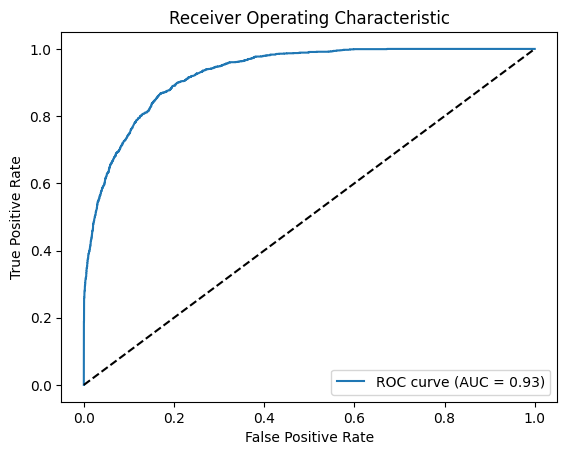

In [22]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

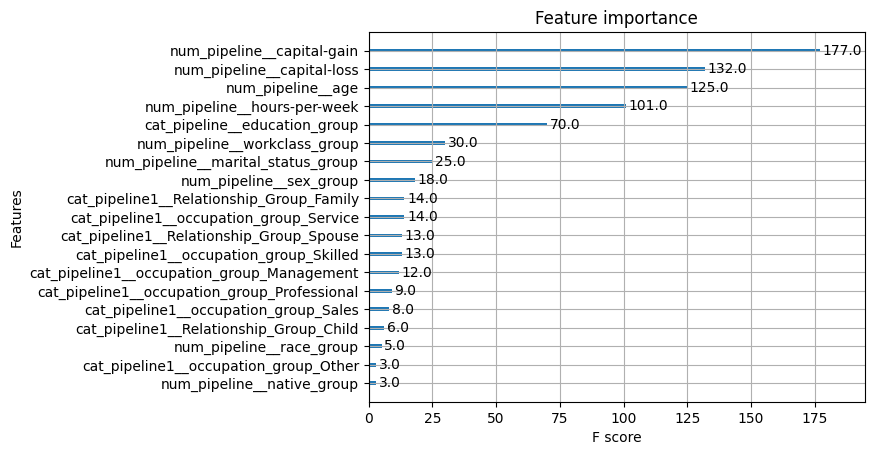

In [23]:
# Plot feature importance
xgb.plot_importance(xg_best_model)
plt.show()

In [29]:
xg_grid.best_params_

{'learning_rate': 0.053823386514435315, 'max_depth': 5, 'n_estimators': 149}

In [30]:
dt_grid.best_params_

{'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 2}

In [31]:
rf_grid.best_params_

{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}